<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
### building the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start witha small T and increase it later

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and  x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and  x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and  x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and  x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)



In [10]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 1s 5ms/step - loss: 0.7792 - accuracy: 0.4900 - val_loss: 0.7066 - val_accuracy: 0.4856
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5128 - val_loss: 0.6986 - val_accuracy: 0.4968
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5204 - val_loss: 0.6998 - val_accuracy: 0.4968
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5264 - val_loss: 0.7009 - val_accuracy: 0.4912
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5180 - val_loss: 0.6998 - val_accuracy: 0.4848
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5324 - val_loss: 0.6993 - val_accuracy: 0.4892
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5228 - val_loss: 0.6988 - val_accuracy: 0.4896
Epoch 8/100
79/79 [======

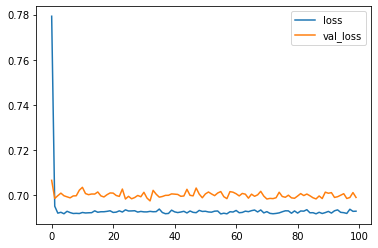

In [11]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

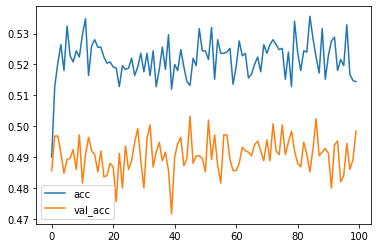

In [13]:
#Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam'
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy']
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5672 - val_loss: 0.6560 - val_accuracy: 0.6396
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.6876 - val_loss: 0.5992 - val_accuracy: 0.7180
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5813 - accuracy: 0.7328 - val_loss: 0.5515 - val_accuracy: 0.7476
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7604 - val_loss: 0.5061 - val_accuracy: 0.7804
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 0.7816 - val_loss: 0.4562 - val_accuracy: 0.8040
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4401 - accuracy: 0.8184 - val_loss: 0.3850 - val_accuracy: 0.8592
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3765 - accuracy: 0.8692 - val_loss: 0.3306 - val_accuracy: 0.8848
Epoch 8/200
7

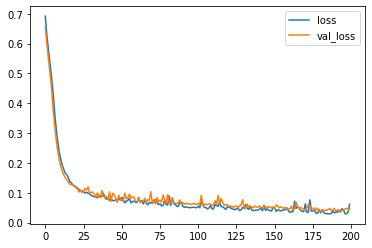

In [17]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

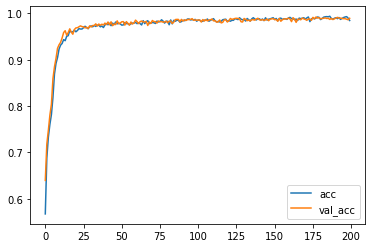

In [18]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Now change to the long distance problem
# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [21]:
# Now test our simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam'
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7037 - accuracy: 0.4936 - val_loss: 0.6938 - val_accuracy: 0.5124
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5140
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6894 - val_accuracy: 0.5444
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.5456 - val_loss: 0.6871 - val_accuracy: 0.5628
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5480 - val_loss: 0.6842 - val_accuracy: 0.5644
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5576 - val_loss: 0.6671 - val_accuracy: 0.5748
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.5972 - val_loss: 0.6393 - val_accuracy: 0.6156
Epoch 8/200
7

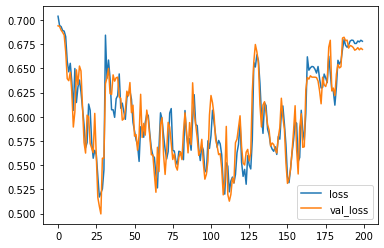

In [22]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

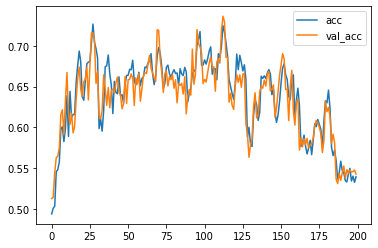

In [23]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [26]:
# Now test the LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6947 - accuracy: 0.4988 - val_loss: 0.6935 - val_accuracy: 0.4952
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.4976 - val_loss: 0.6930 - val_accuracy: 0.5052
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5068 - val_loss: 0.6936 - val_accuracy: 0.4956
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6941 - accuracy: 0.4972 - val_loss: 0.6929 - val_accuracy: 0.5112
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5080 - val_loss: 0.6929 - val_accuracy: 0.5116
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5124 - val_loss: 0.6929 - val_accuracy: 0.5108
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.5104
Epoch 8/200


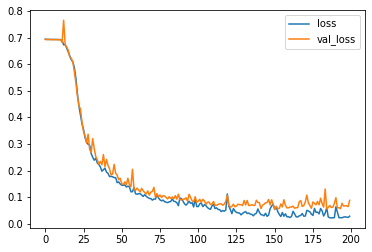

In [27]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

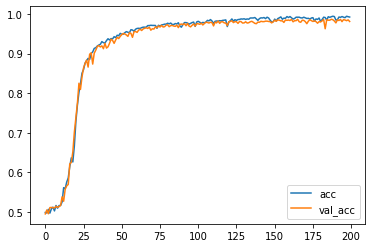

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [29]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [30]:
# Now test the Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 1s 9ms/step - loss: 0.7271 - accuracy: 0.4904 - val_loss: 0.6997 - val_accuracy: 0.4788
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.4956 - val_loss: 0.6958 - val_accuracy: 0.4916
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.5048 - val_loss: 0.7012 - val_accuracy: 0.4908
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5096 - val_loss: 0.6987 - val_accuracy: 0.4900
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6990 - val_accuracy: 0.4836
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.5076 - val_loss: 0.6967 - val_accuracy: 0.4920
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5208 - val_loss: 0.7005 - val_accuracy: 0.4940
Epoch 8/200
79/79 [======

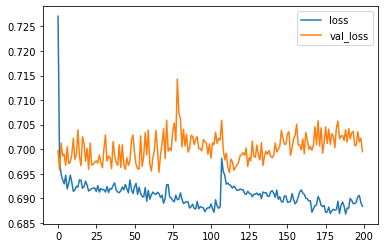

In [31]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

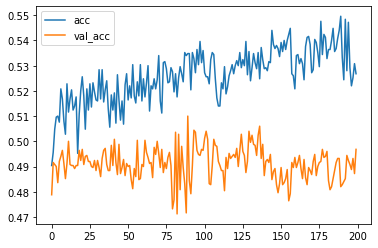

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
# Now test the LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 17ms/step - loss: 0.6928 - accuracy: 0.5148 - val_loss: 0.6992 - val_accuracy: 0.4932
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5236 - val_loss: 0.6986 - val_accuracy: 0.4852
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6925 - accuracy: 0.5124 - val_loss: 0.6962 - val_accuracy: 0.4860
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5100 - val_loss: 0.7000 - val_accuracy: 0.4896
Epoch 5/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6914 - accuracy: 0.5260 - val_loss: 0.6973 - val_accuracy: 0.4872
Epoch 6/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6909 - accuracy: 0.5276 - val_loss: 0.6961 - val_accuracy: 0.4880
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6915 - accuracy: 0.5300 - val_loss: 0.6966 - val_accuracy: 0.4936
Epoch 

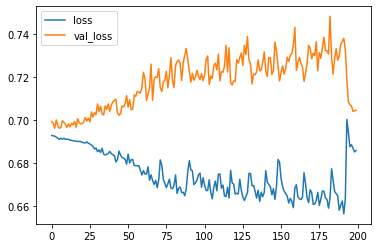

In [34]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

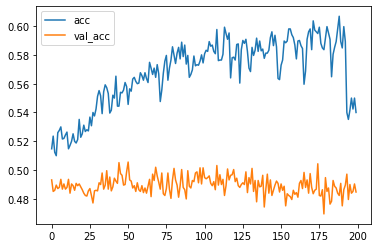

In [35]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
# Now test the GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 3s 17ms/step - loss: 0.6933 - accuracy: 0.5052 - val_loss: 0.7035 - val_accuracy: 0.4900
Epoch 2/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6983 - val_accuracy: 0.4896
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6954 - val_accuracy: 0.4900
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5048 - val_loss: 0.6953 - val_accuracy: 0.4852
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6919 - accuracy: 0.5168 - val_loss: 0.6971 - val_accuracy: 0.4976
Epoch 6/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6915 - accuracy: 0.5252 - val_loss: 0.6999 - val_accuracy: 0.4940
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6919 - accuracy: 0.5124 - val_loss: 0.6994 - val_accuracy: 0.4876
Epoch 

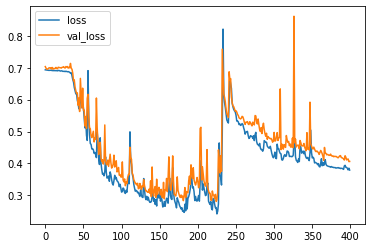

In [37]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

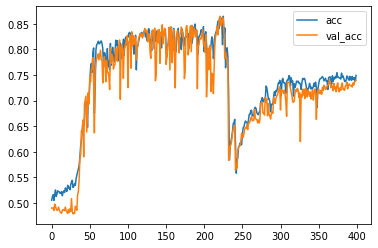

In [38]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [39]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [40]:
# Now test the LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 22ms/step - loss: 0.6944 - accuracy: 0.5008 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.5072 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6939 - accuracy: 0.4936 - val_loss: 0.6936 - val_accuracy: 0.4960
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.4976
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.4988 - val_loss: 0.6935 - val_accuracy: 0.4964
Epoch 6/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6938 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 7/200
79/79 [==============================] - 2s 21ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.4968
Epoch 

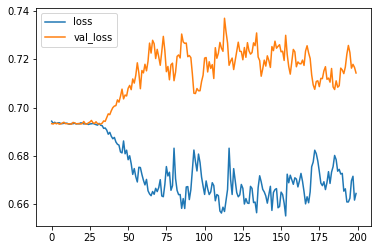

In [41]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

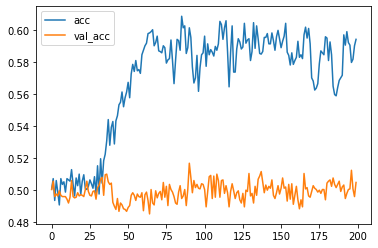

In [42]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [44]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 6s 22ms/step - loss: 0.6951 - accuracy: 0.5068 - val_loss: 0.6947 - val_accuracy: 0.4960
Epoch 2/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6942 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5052
Epoch 3/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6940 - val_accuracy: 0.5040
Epoch 4/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6946 - accuracy: 0.4996 - val_loss: 0.6936 - val_accuracy: 0.4956
Epoch 5/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6925 - accuracy: 0.5156 - val_loss: 0.6945 - val_accuracy: 0.4952
Epoch 6/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 7/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6919 - accuracy: 0.5128 - val_loss: 0.6926 - val_accuracy: 0.5216
Epoch 

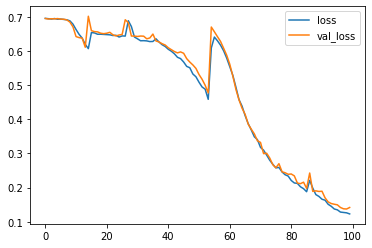

In [45]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

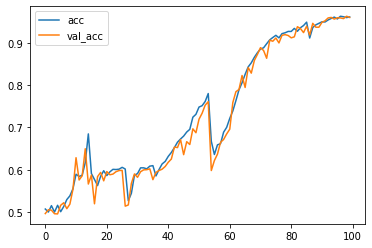

In [46]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()